2-1 훈련 세트와 테스트 세트
======================
> ### 도미 35마리와 빙어 14마리 구분하기
> * 생선을 구분하기 위해 생선의 길이와 무게를 측정한 데이터 활용

In [ ]:
# 도미와 빙어의 길이와 무게
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
# 길이와 무게를 하나의 리스트로 담은 2차원 리스트 생성
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
# 도미는 1, 빙어는 0으로 표현한 정답데이터 생성
fish_target = [1]*35 + [0]*14

> ### 도미와 빙어를 구분하기 위해 k-최근접 이웃 알고리즘을 활용
> * 최근접 이웃 알고리즘은, 새로운 데이터를 입력 받았을 때 가장 가까이 있는 것을 중심으로 새로운 데이터의 종류를 정해주는 알고리즘

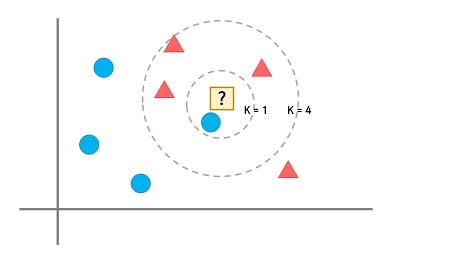
출처 : https://gomguard.tistory.com/51

In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
# 모델객체 생성
kn = KNeighborsClassifier()

In [ ]:
# 입력값과 타깃값을 슬라이싱하여 훈련세트와 테스트세트 생성 
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
# 모델을 훈련하고 평가
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

> ### 샘플링 편향
> * 훈련세트와 테스트세트를 나누기 위해서는, 도미와 빙어를 골고루 섞이게 만들어야 함 

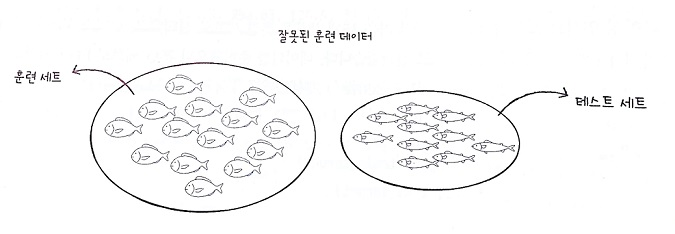

In [ ]:
import numpy as np

In [ ]:
# 리스트를 넘파이 배열로 변환
# 넘파이 array() 함수에 파이썬 리스트 전달
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr.shape)

(49, 2)


> * 무작위로 샘플을 고르기 위해, 입력값과 타깃값에 인덱스를 만들어 줌 

In [ ]:
# 책과 동일한 결과를 얻을 수 있도록 랜덤시드를 지정
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [ ]:
# index 배열을 입력값과 타깃값에 전달하여 랜덤하게 35개의 샘플을 훈련세트로 생성
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
# 나머지 14는 테스트 세트로 생성
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

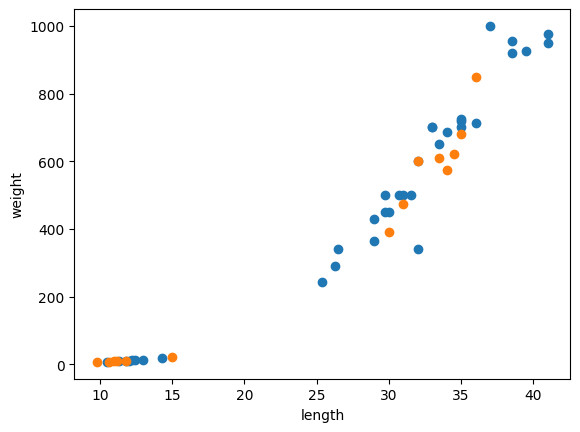

In [ ]:
# 훈련세트에 도미와 빙어가 잘 섞여있는지 산점도로 확인
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> ### 두번째 머신러닝 프로그램
> * 앞서만든 훈련 세트와 테스트 세트로 k-최근접 이웃 모델을 훈련

In [ ]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

> * 테스트 세트의 예측 결과와 실제 타깃을 비교

In [ ]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

2-2 데이터 전처리
==================
> ### 앞서 만든 모델을 활용하여 길이가 25cm이고 무게가 150g인 생선을 예측하면, 어떤 생선으로 예측될까?
> * 넘파이로 데이터 준비하기

In [ ]:
# column_stack() 함수로 길이와 무게에 대한 리스트를 붙여줌
fish_data = np.column_stack((fish_length, fish_weight))

# concatenate() 함수를 이용해 1이 35개인 배열과 0이 14개인 정답배열을 생성
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

> ### 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수의 stratify 매개변수에 타깃 데이터를 전달하여 샘플링 편향을 방지
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [ ]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
print(kn.predict([[25, 150]]))

[0.]


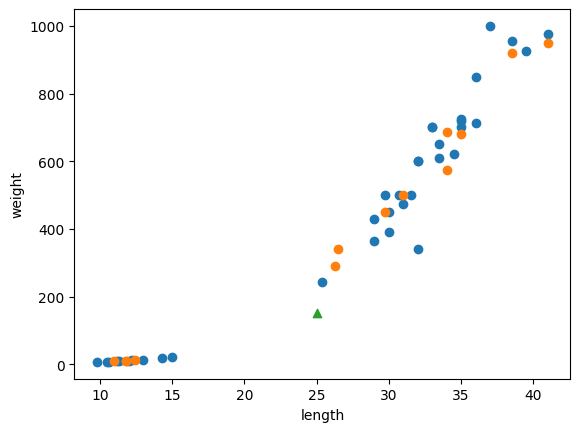

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> * 주어진 샘플에서 가장 가까운 이웃 확인

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])

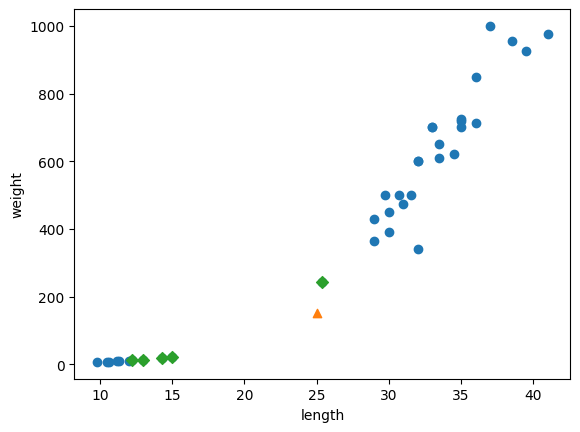

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
# 훈련 데이터 중에서 이웃 샘플을 따로 구분해 표시
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


> ### 기준 맞추기
> * 각 특성에 대한 스케일 확인

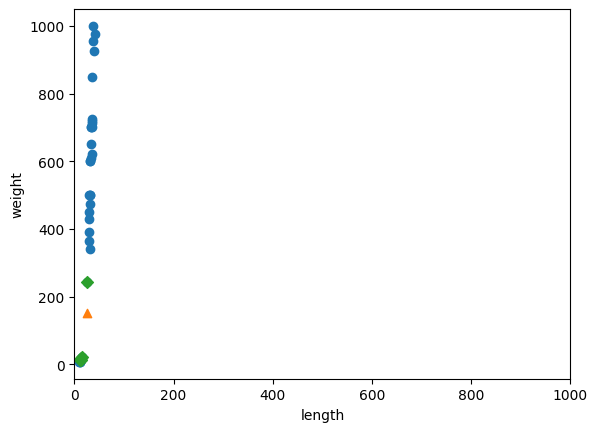

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> * 길이와 무게인 두 특성은 값의 범위가 매우 다르기 때문에, 특성값을 일정한 기준으로 맞춰 주어야지만 알고리즘이 올바른 예측을 할 수 있음
> * 이러한 작업을 **데이터 전처리(data preprocessing)** 라고 함
> * 가장 널리 사용하는 전처리 방법 중 하나는 **표준점수(standard score)** 의 활용
> * **표준점수**는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타냄
>
> $$z = \frac{x - \mu}{\sigma}$$
> * $z$는 표준점수, $x$는 샘플 값, $\mu$는 평균, $\sigma$는 표준편차

In [ ]:
# 평균과 표준편차 산출
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [ ]:
# 표준점수 산출
train_scaled = (train_input - mean) / std  # 넘파이의 브로드캐스팅 기능

> ### 전처리 데이터로 모델 훈련하기
> * 샘플인 생선[25, 150] 값도 동일한 방식으로 전처리
> * 훈련 세트의 평균과 표준편차 값을 이용하여 변환해야 동일한 비율로 변환됨 

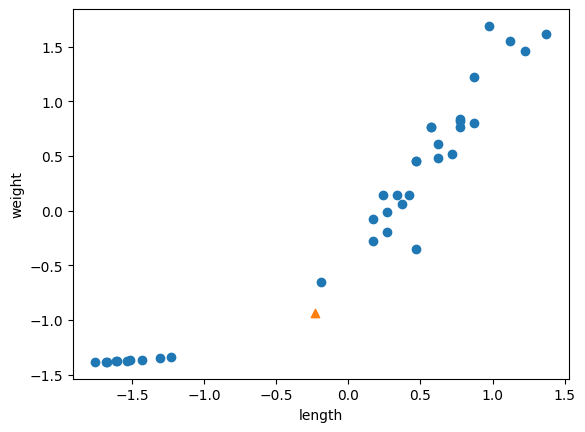

In [ ]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 모델 훈련
kn.fit(train_scaled, train_target)

# 테스트 세트 또한 훈련세트 기준으로 변환해야 동일한 기준으로 변환됨
test_scaled = (test_input - mean) / std

# 평가
kn.score(test_scaled, test_target)

1.0

In [ ]:
# 샘플값 예측
print(kn.predict([new]))

[1.]


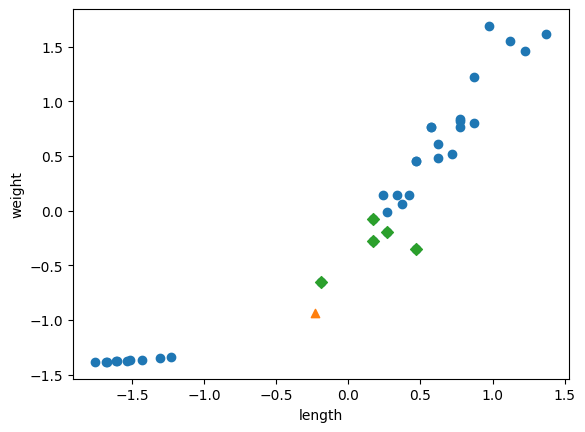

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()